## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df2 = df.drop(columns = ["view", "sqft_above", "sqft_basement", 
"yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])
df = df.drop(columns = ["date", "view", "sqft_above", "sqft_basement", 
"yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])

In [3]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [4]:
df2['date'] = pd.to_datetime(df2['date']) 

In [5]:
df2['year_sold'] = pd.DatetimeIndex(df2['date']).year

In [6]:
df2.describe()
#Only homes sold in 2014-2015

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,year_sold
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,2014.322962
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,0.467619
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,2014.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,2015.000000


In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19221 non-null  int64  
 1   price        19221 non-null  float64
 2   bedrooms     19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   sqft_living  19221 non-null  int64  
 5   sqft_lot     19221 non-null  int64  
 6   floors       19221 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    19221 non-null  object 
 9   grade        19221 non-null  object 
 10  yr_built     19221 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [9]:
def vs(x, y, z):
    print(df.value_counts(x))
    print(df.value_counts(y))
    print(df.value_counts(z))

In [10]:
vs("waterfront", "condition", "grade")

waterfront
NO     19075
YES      146
dtype: int64
condition
Average      12474
Good          5058
Very Good     1512
Fair           152
Poor            25
dtype: int64
grade
7 Average        7974
8 Good           5409
9 Better         2320
6 Low Average    1810
10 Very Good     1018
11 Excellent      357
5 Fair            212
12 Luxury          82
4 Low              25
13 Mansion         13
3 Poor              1
dtype: int64


In [11]:
df = df.replace("NO", 0)
df = df.replace("YES", 1)

In [12]:
df.value_counts("waterfront")

waterfront
0    19075
1      146
dtype: int64

In [13]:
rep = df.replace
def condition(a, b, c, d, e):
    rep(a, 1, inplace=True)
    rep(b, 2, inplace=True)
    rep(c, 3, inplace=True)
    rep(d, 4, inplace=True)
    rep(e, 5, inplace=True)
    print(df.value_counts("condition"))

condition("Poor", "Fair", "Average", "Good", "Very Good")

condition
3    12474
4     5058
5     1512
2      152
1       25
dtype: int64


In [14]:
def grade (a, b, c, d, e, f, g, h, i, j, k):
    rep(a, 3, inplace=True)
    rep(b, 4, inplace=True)
    rep(c, 5, inplace=True)
    rep(d, 6, inplace=True)
    rep(e, 7, inplace=True)
    rep(f, 8, inplace=True)
    rep(g, 9, inplace=True)
    rep(h, 10, inplace=True)
    rep(i, 11, inplace=True)
    rep(j, 12, inplace=True)
    rep(k, 13, inplace=True)
    print(df.value_counts("grade"))
    
grade("3 Poor", "4 Low", "5 Fair", "6 Low Average", "7 Average", "8 Good", "9 Better", "10 Very Good", 
          "11 Excellent", "12 Luxury", "13 Mansion")

grade
7     7974
8     5409
9     2320
6     1810
10    1018
11     357
5      212
12      82
4       25
13      13
3        1
dtype: int64


In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.922100e+04,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,4.592301e+09,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,3.409968,7.661048,1971.039800
std,2.876995e+09,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.650280,1.175998,29.384666
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.334501e+09,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [16]:
X = df.drop("price", axis=1)
y = df["price"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 14415 rows and 10 columns
y_train is a Series with 14415 values


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=3)

array([0.63963391, 0.6423598 , 0.66913925])

In [21]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6364767961260284

In [22]:
from sklearn.metrics import mean_squared_error
y_hat_test = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

46871950507.75605

In [23]:
from sklearn.model_selection import cross_val_score
cv_5_results = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_5_results

array([5.47348903e+10, 5.02915769e+10, 4.35694344e+10, 4.52275307e+10,
       5.21593540e+10])

In [24]:
cv_5_results.mean()

49196557268.46166

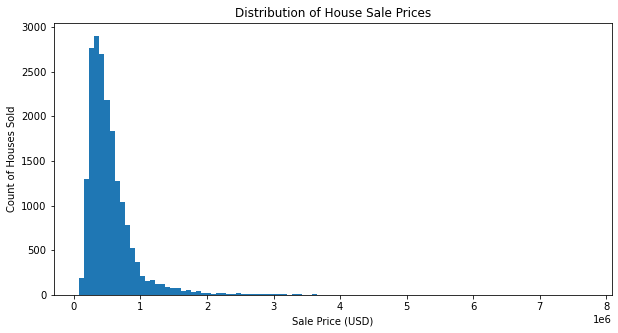

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y, bins=100)

ax.set_xlabel("Sale Price (USD)")
ax.set_ylabel("Count of Houses Sold")
ax.set_title("Distribution of House Sale Prices");

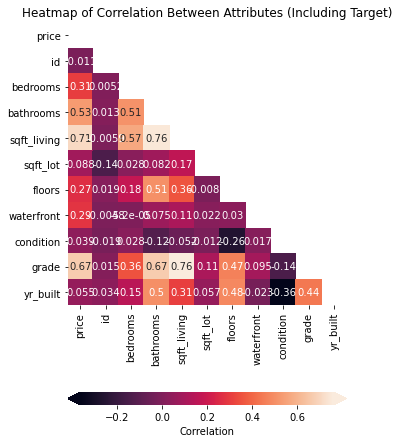

In [26]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

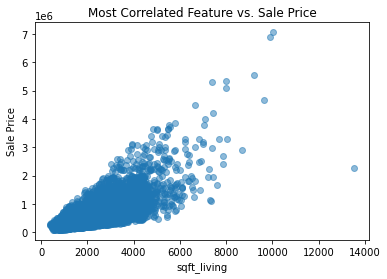

In [27]:
most_correlated_feature = "sqft_living"
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Sale Price")
ax.set_title("Most Correlated Feature vs. Sale Price");

In [28]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.49986799732932813
Validation score: 0.5003429655065165


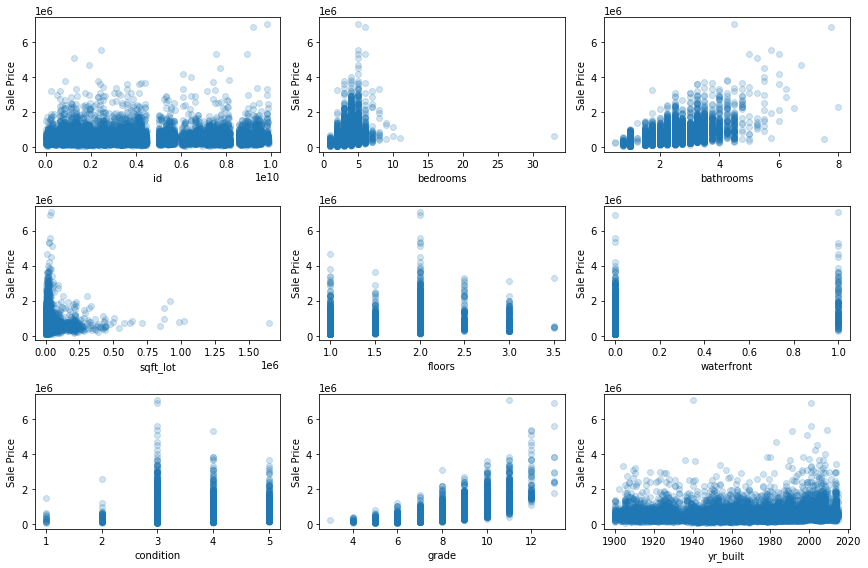

In [65]:
scatterplot_data = X_train.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3,nrows=3,figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Sale Price")

In [42]:
X_train_second_model = X_train.drop(["id"], axis=1).copy()

X_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
9364,3,1.75,1270,4815,1.5,0,3,6,1922
20531,3,3.50,1710,2212,2.0,0,3,7,2013
13399,4,2.75,2970,59677,1.0,0,4,8,1973
11172,3,2.00,1320,5665,1.0,0,3,7,1986
15510,3,1.75,2000,5680,1.0,0,4,7,1903
...,...,...,...,...,...,...,...,...,...
12685,3,1.00,1190,9083,1.0,0,3,7,1955
13442,6,1.50,1810,4838,1.5,0,4,5,1905
6091,3,1.00,1110,7000,1.5,0,4,7,1955
973,4,2.75,2790,10819,2.0,0,3,10,1996


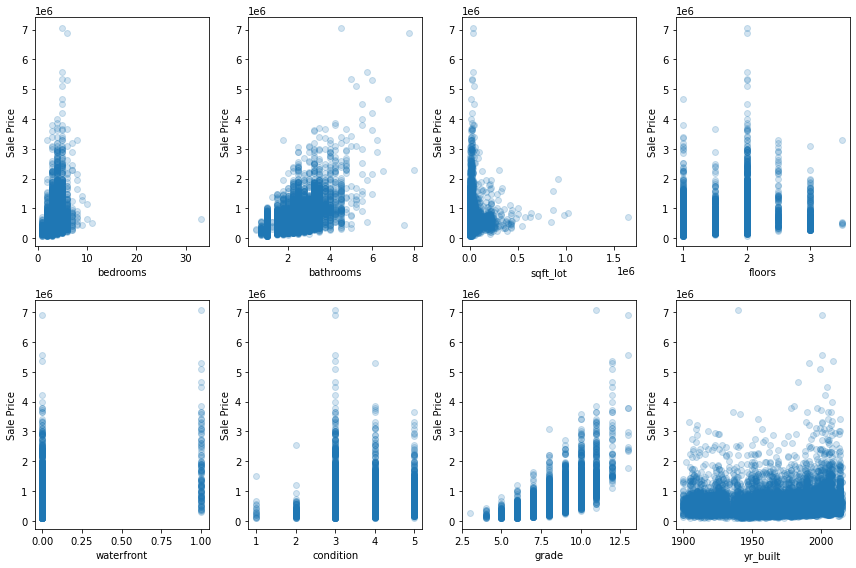

In [66]:
scatterplot_data = X_train_second_model.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=4,nrows=2,figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("Sale Price")

In [43]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.648763284250451
Validation score: 0.6620300067925414

Baseline Model
Train score:      0.49986799732932813
Validation score: 0.5003429655065165


In [44]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3014.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:16:25   Log-Likelihood:            -1.9789e+05
No. Observations:               14415   AIC:                         3.958e+05
Df Residuals:                   14405   BIC:                         3.959e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.673e+06   1.61e+05     41.434      0.000    6.36e+06    6.99e+06
bedrooms    -4.218e+04   2487.521    -16.955      0.000   -4.71e+04   -3.73e+04
bathrooms    5.079e+04   4288.381     11.843      0.000    4.24e+04    5.92e+04
sqft_living   182.7459      4.027     45.377      0.000     174.852     190.640
sqft_lot       -0.2349      0.045     -5.164      0.000      -0.324      -0.146
floors       2.111e+04   4309.060      4.899      0.000    1.27e+04    2.96e+04
waterfront   7.873e+05   2.15e+04     36.618      0.000    7.45e+05    8.29e+05
condition    1.783e+04   3102.816      5.746      0.000    1.17e+04    2.39e+04
grade        1.275e+05   2660.699     47.911      0.000    1.22e+05    1.33e+05
yr_built    -3829.6035     82.712    -46.301      0.000   -3991.729   -3667.478
==============================================================================
Omnibus:                    10374.917   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           596326.288
Skew:                           2.875   Prob(JB):                         0.00
Kurtosis:                      33.980   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
condition: True
grade: True
yr_built: True


In [46]:
from itertools import combinations

features = ["sqft_living", "bedrooms", "bathrooms", "sqft_lot", "floors", "waterfront", "condition", "grade", "yr_built"]

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=X_train_second_model[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train_second_model[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 3 additional features    
for (feature1, feature2, feature3) in list(combinations(features[1:], 3)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train_second_model[["sqft_living", feature1, feature2, feature3]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 4 additional features    
for (feature1, feature2, feature3, feature4) in list(combinations(features[1:], 4)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train_second_model[["sqft_living", feature1, feature2, feature3, feature4]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 5 additional features    
for (feature1, feature2, feature3, feature4, feature5) in list(combinations(features[1:], 5)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train_second_model[["sqft_living", feature1, feature2, feature3, feature4, feature5]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 6 additional features    
for (feature1, feature2, feature3, feature4, feature5, feature6) in list(combinations(features[1:], 6)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train_second_model[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        feature6: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 7 additional features    
for (feature1, feature2, feature3, feature4, feature5, feature6, feature7) in list(combinations(features[1:], 7)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train_second_model[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        feature6: "Yes",
        feature7: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Including all additional features
results_df = results_df.append({
    "bedrooms": "Yes", "bathrooms": "Yes", "sqft_lot": "Yes", "floors": "Yes", 
    "waterfront": "Yes", "condition": "Yes", "grade": "Yes", "yr_built": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df.sort_values(by=['val_score'], ascending=False)
# Sorting by validation data because we want the ability to generate prices for 
#future Home sales, not the ability to fit well to the known Home sales features

,sqft_living,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built,train_score,val_score
255,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.648763,0.662030
252,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,0.648077,0.661597
251,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,0.648242,0.661292
249,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.648004,0.661137
233,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,0.647468,0.660764
...,...,...,...,...,...,...,...,...,...,...,...
3,Yes,No,No,Yes,No,No,No,No,No,0.500846,0.501609
17,Yes,No,Yes,No,Yes,No,No,No,No,0.500048,0.500661
4,Yes,No,No,No,Yes,No,No,No,No,0.499975,0.500525
2,Yes,No,Yes,No,No,No,No,No,No,0.499883,0.500375


In [47]:
final_model = LinearRegression()
X_test_final = X_test.drop(["id"], axis=1).copy()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_second_model, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.6361494010802955

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)
#means the model created could be off by as much as $216596

216596.77782977765

In [49]:
print(pd.Series(final_model.coef_, index=X_train_second_model.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)
#Intercept starting price of home, up and down for each column. 

bedrooms       -42176.745449
bathrooms       50786.621402
sqft_living       182.745921
sqft_lot           -0.234938
floors          21108.619332
waterfront     787274.580114
condition       17830.204723
grade          127477.487846
yr_built        -3829.603494
Name: Coefficients, dtype: float64

Intercept: 6672793.669810889


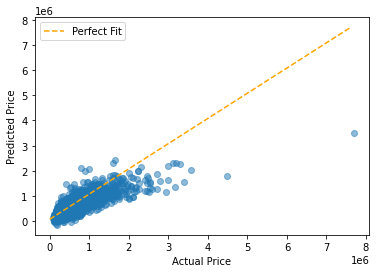

In [50]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();
#Linearity

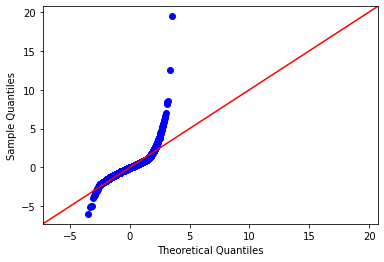

In [51]:
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
#Normality

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_second_model.values, i) for i in range(X_train_second_model.shape[1])]
pd.Series(vif, index=X_train_second_model.columns, name="Variance Inflation Factor")
#multicollinearity- well above 5 on several, so high multicollinearity

bedrooms        22.206483
bathrooms       24.618493
sqft_living     24.593274
sqft_lot         1.186860
floors          13.266779
waterfront       1.029062
condition       29.589197
grade          123.630312
yr_built       123.257248
Name: Variance Inflation Factor, dtype: float64

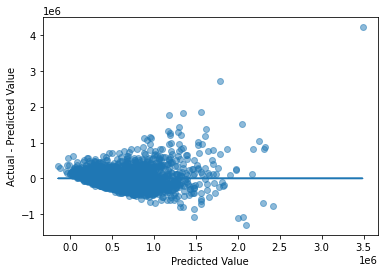

In [53]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
#Homoscedasticity- variation of error across independent variables